In [27]:
import pandas
import xlrd

arrayData = []

rb = xlrd.open_workbook('echocardiogram.data.xls',formatting_info=True)
sheet = rb.sheet_by_index(0)
for rownum in range(sheet.nrows - 1):
    row = sheet.row_values(rownum + 1)
    values = []
    flag = True
    for i in range(len(row)):
         if i == 1 :
             if type(row[i]) is float : target = row[i]
             else: flag = False
         else:
             if type(row[i]) is float :
                 value = row[i]
             else: flag = False
             values.append(value)
    if flag == True:
        
     values.append(target)   
     arrayData.append(values)
        


df = pandas.DataFrame(arrayData)  

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,11.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,0.0
1,19.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,0.0
2,16.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,0.0
3,57.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,0.0
4,19.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,1.0


In [10]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [12]:
# load dataset
dataframe = df
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:9].astype(float)
Y = dataset[:,9]

In [13]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [25]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [15]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold( shuffle=True, random_state=seed)
results = cross_val_score(pipeline, normalized_X, encoded_Y, cv=kfold)
print("Result: %.2f%% +-(%.2f%%)" % (results.mean()*100, results.std()*100))

Result: 66.67% +-(5.00%)


In [23]:
# smaller model
def create_smaller():
    # create model
    model = Sequential()
    model.add(Dense(3, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold( shuffle=True, random_state=seed)
results = cross_val_score(pipeline, normalized_X, encoded_Y, cv=kfold, pre_dispatch='5')
print("Result: %.2f%% +-(%.2f%%)" % (results.mean()*100, results.std()*100))

Result: 64.71% +-(2.40%)


In [12]:
from sklearn.manifold import TSNE

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
t = TSNE(perplexity=50)
q = t.fit_transform(df.drop(9, axis=1));

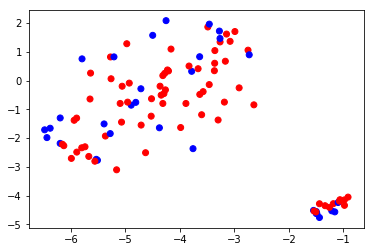

In [24]:
plt.scatter(q[:, 0], q[:, 1], c=df[9].map({ 0: 'r', 1: 'b' }));

In [25]:
import seaborn as sns
sns.set()

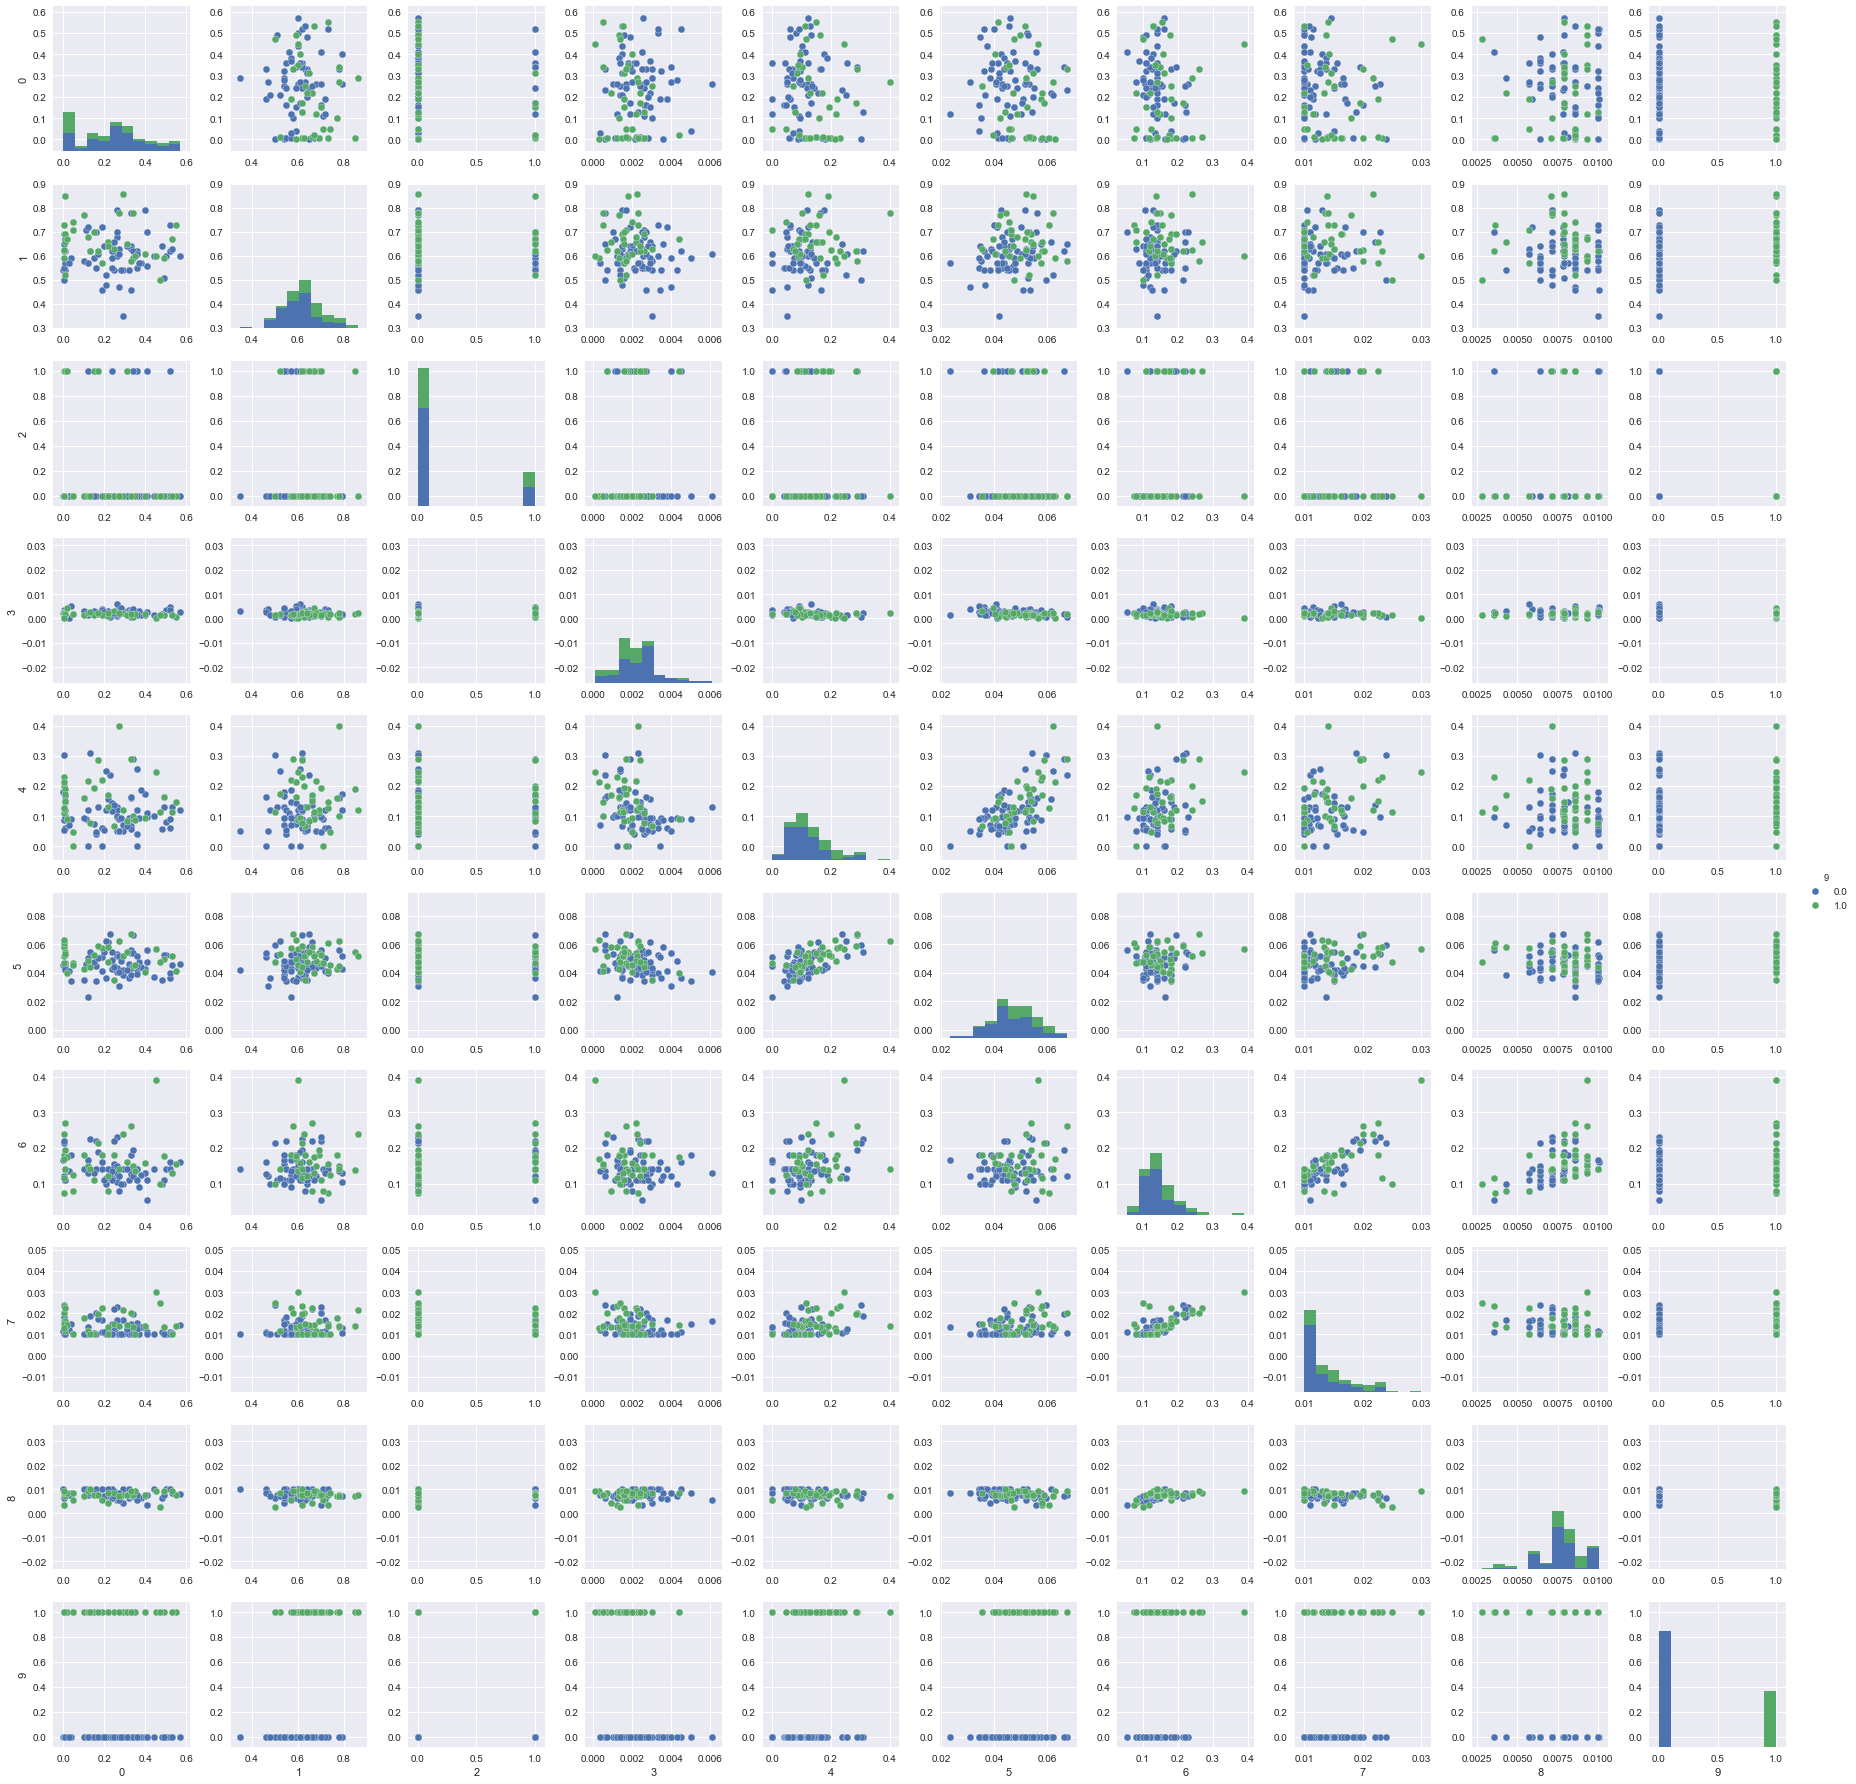

In [33]:
sns.pairplot(df, hue=9, diag_kind="kde");